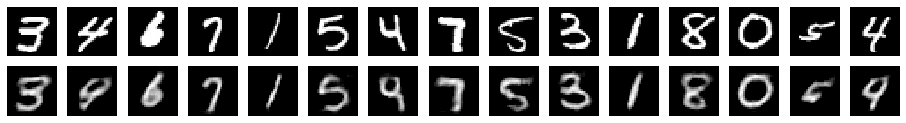

In [1]:
%matplotlib inline
import numpy as np
import tensorflow.keras as keras
from AE_worker import build_and_compile_autoencoder
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test =  x_test / 255.0
x_test = x_test.reshape((-1, 28,28,1))

multi_worker_model = build_and_compile_autoencoder()
multi_worker_model.load_weights('./keras-ckpt')
pred=multi_worker_model.predict(x_test)

predictions=pred.reshape((-1,28,28))

x_test=x_test.reshape((-1,28,28))

fig, axes1 = plt.subplots(2,15,figsize=(16,2))
for k in range(15):
    i = np.random.choice(range(len(x_test)))
    for j in range(2):
        axes1[j][k].set_axis_off()
        if j==0 :
            axes1[j][k].imshow(x_test[i], cmap='gray')
        else:
            axes1[j][k].imshow(predictions[i], cmap='gray')
